## Getting Information from Binance

In [1]:
import pandas as pd
import os
import time
from binance.client import Client
from datetime import timedelta, datetime
import numpy as np

binance_api_key = os.environ.get('BINANCE_API_KEY')
binance_api_secret = os.environ.get('BINANCE_SECRET')
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)


In [2]:
klines = binance_client.get_historical_klines('PEPEUSDC', Client.KLINE_INTERVAL_1HOUR, limit=1000)#"01 Mar, 2924 00:00:00","23 Jul, 2024 00:03:00")

In [3]:
# Put klines into a pandas dataframe.
# Klines have the following information: Kline open time, open price, high price, low price, close price, volume, kline close time, quote asset volume, number of trades, taker buy base asset volume, taker buy quote asset volume, ignore.

df = pd.DataFrame(klines, columns = ['Kline Open Time', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume', 'Kline Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'])

# Convert Open Time and Close Time to datetime format.

df['Kline Open Time'] = pd.to_datetime(df['Kline Open Time'], unit='ms')
df['Kline Close Time'] = pd.to_datetime(df['Kline Close Time'], unit='ms')

# Drop the Ignore column.

df = df.drop('Ignore', axis=1)

In [4]:
# Set kline open time as the index of the dataframe.

df = df.set_index('Kline Open Time')

# Convert the data types of the columns to float.

df['Open Price'] = df['Open Price'].astype(float)
df['High Price'] = df['High Price'].astype(float)
df['Low Price'] = df['Low Price'].astype(float)
df['Close Price'] = df['Close Price'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df['Quote Asset Volume'] = df['Quote Asset Volume'].astype(float)
df['Number of Trades'] = df['Number of Trades'].astype(float)
df['Taker Buy Base Asset Volume'] = df['Taker Buy Base Asset Volume'].astype(float)
df['Taker Buy Quote Asset Volume'] = df['Taker Buy Quote Asset Volume'].astype(float)


In [5]:
# Create a new column for the moving average of the close price.

df['Close Price MA'] = df['Close Price'].rolling(window=20).mean()

# Create a new column for the moving average of the volume.

df['Volume MA'] = df['Volume'].rolling(window=20).mean()

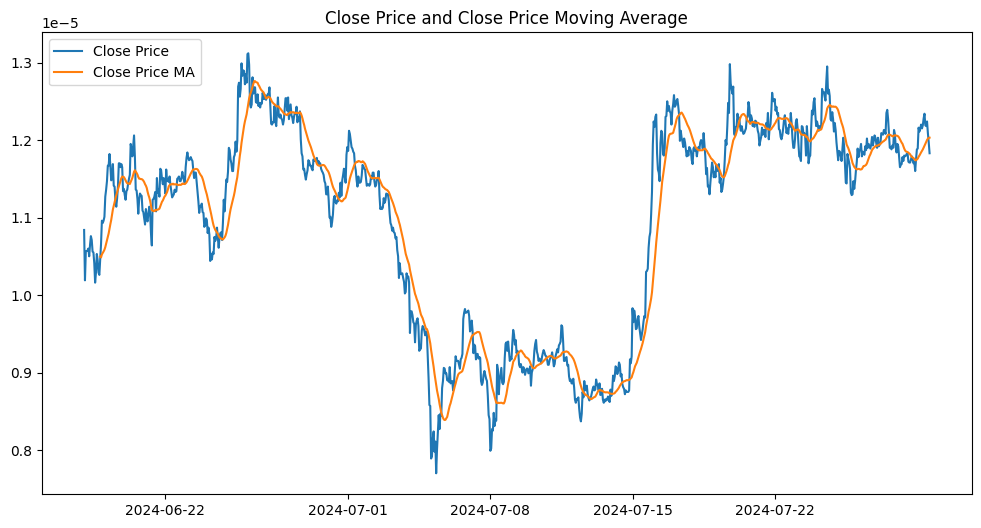

In [6]:
# Plot the close price and the moving average of the close price.

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close Price'], label='Close Price')
plt.plot(df['Close Price MA'], label='Close Price MA')
plt.title('Close Price and Close Price Moving Average')
plt.legend()
plt.show()


## Retrieving Blockchain transactions from Etherscan

### Getting all recent Pepe Transactions

In [54]:
pepe_address = '0x6982508145454ce325ddbe47a25d4ec3d2311933'

# https://ide.bitquery.io/exploreapi/PEPE/0x6982508145454ce325ddbe47a25d4ec3d2311933

etherscan_token = '3EVVE3ZWSR4SI7IH4VJJDRGH2Z3C4QQ1SM'

# Get a history of PEPE transactions on the blockchain using etherscan API for the last 1,000 hours

url = 'https://api.etherscan.io/api?module=account&action=tokentx&contractaddress=' + pepe_address + '&page=1&offset=1000&sort=desc&apikey=' + etherscan_token

pepe_transactions = pd.read_json(url)

pepe_transactions


,status,message,result
0,1,OK,"{'blockNumber': '20413204', 'timeStamp': '1722..."
1,1,OK,"{'blockNumber': '20413204', 'timeStamp': '1722..."
2,1,OK,"{'blockNumber': '20413204', 'timeStamp': '1722..."
3,1,OK,"{'blockNumber': '20413203', 'timeStamp': '1722..."
4,1,OK,"{'blockNumber': '20413202', 'timeStamp': '1722..."
...,...,...,...
995,1,OK,"{'blockNumber': '20412117', 'timeStamp': '1722..."
996,1,OK,"{'blockNumber': '20412116', 'timeStamp': '1722..."
997,1,OK,"{'blockNumber': '20412114', 'timeStamp': '1722..."
998,1,OK,"{'blockNumber': '20412110', 'timeStamp': '1722..."


In [57]:
pepe_transactions['result'][999]

{'blockNumber': '20412109',
 'timeStamp': '1722254771',
 'hash': '0x4966aff09ef1ed810a0ac8360902cc6b8c01ea92187e6cae9dbd46ea788f33c6',
 'nonce': '217797',
 'blockHash': '0x0a8c0b282eb776961f3113a292c8bcddc595690b7ce490cb2d9d77f236ab0615',
 'from': '0xbcc66fc7402daa98f5764057f95ac66b9391cd6b',
 'contractAddress': '0x6982508145454ce325ddbe47a25d4ec3d2311933',
 'to': '0xa69babef1ca67a37ffaf7a485dfff3382056e78c',
 'value': '779999999999999999999999999',
 'tokenName': 'Pepe',
 'tokenSymbol': 'PEPE',
 'tokenDecimal': '18',
 'transactionIndex': '62',
 'gas': '549950',
 'gasPrice': '3056783199',
 'gasUsed': '267299',
 'cumulativeGasUsed': '4187155',
 'input': 'deprecated',
 'confirmations': '1099'}

In [ ]:
pepe_transactions['result'][1]

In [56]:
#Show the first result of the transactions
pepe_transactions['result'][1]

{'blockNumber': '20413204',
 'timeStamp': '1722267947',
 'hash': '0x79746d642aaa3c5108b00edcc2e677c9091690bd22378815ec126fe7c6d9b84d',
 'nonce': '98',
 'blockHash': '0x856f8c4aab2ef6b66c346261848ff71609f6a8fe5ef70517021d1f7d4e9d86d1',
 'from': '0x74de5d4fcbf63e00296fd95d33236b9794016631',
 'contractAddress': '0x6982508145454ce325ddbe47a25d4ec3d2311933',
 'to': '0xe37e799d5077682fa0a244d46e5649f71457bd09',
 'value': '284318121169407588725004864',
 'tokenName': 'Pepe',
 'tokenSymbol': 'PEPE',
 'tokenDecimal': '18',
 'transactionIndex': '24',
 'gas': '376675',
 'gasPrice': '5427652056',
 'gasUsed': '278002',
 'cumulativeGasUsed': '4437214',
 'input': 'deprecated',
 'confirmations': '4'}

### Getting Logs

In [15]:
url = 'https://api.etherscan.io/api?module=logs&action=getLogs&address=' + pepe_address +'&page=1&offset=1000&apikey='+etherscan_token

pepe_logs = pd.read_json(url)

pepe_logs

,status,message,result
0,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
1,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
2,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
3,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
4,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
...,...,...,...
995,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
996,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
997,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...
998,1,OK,{'address': '0x6982508145454ce325ddbe47a25d4ec...


In [20]:
pepe_logs['result'][0]

{'address': '0x6982508145454ce325ddbe47a25d4ec3d2311933',
 'topics': ['0x8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0',
  '0x0000000000000000000000000000000000000000000000000000000000000000',
  '0x000000000000000000000000fbfeaf0da0f2fde5c66df570133ae35f3eb58c9a'],
 'data': '0x',
 'blockNumber': '0x1041a59',
 'blockHash': '0xa4cf20c9c9e367e225464eba8dc7a6bb6af4de523144fd400345a0467c7d7041',
 'timeStamp': '0x64396877',
 'gasPrice': '0x757c2bdcb',
 'gasUsed': '0x11e878',
 'logIndex': '0x63',
 'transactionHash': '0x2afae7763487e60b893cb57803694810e6d3d136186a6de6719921afd7ca304a',
 'transactionIndex': '0x50'}

### Getting Txn List

In [27]:
url ='https://api.etherscan.io/api?module=account&action=txlist&address='+ pepe_address + '&startblock=0&endblock=99999999&page=1offset=10&sort=des&apikey=' + etherscan_token

pepe_txn = pd.read_json(url)

pepe_txn

,status,message,result
0,1,OK,"{'blockNumber': '17046105', 'timeStamp': '1681..."
1,1,OK,"{'blockNumber': '17046152', 'timeStamp': '1681..."
2,1,OK,"{'blockNumber': '17046538', 'timeStamp': '1681..."
3,1,OK,"{'blockNumber': '17047544', 'timeStamp': '1681..."
4,1,OK,"{'blockNumber': '17047547', 'timeStamp': '1681..."
...,...,...,...
9995,1,OK,"{'blockNumber': '17075182', 'timeStamp': '1681..."
9996,1,OK,"{'blockNumber': '17075183', 'timeStamp': '1681..."
9997,1,OK,"{'blockNumber': '17075183', 'timeStamp': '1681..."
9998,1,OK,"{'blockNumber': '17075183', 'timeStamp': '1681..."


In [28]:
pepe_txn['result'][9999]

{'blockNumber': '17075184',
 'timeStamp': '1681840763',
 'hash': '0x4dc94662489a59e8ecfcbe47fb9c8797c00e4ada7d53743dd4eea075d3c39113',
 'nonce': '291',
 'blockHash': '0x4824657e78a6b1241623988f11dedfe38e6ac17fd78967500f7ef62b7feed826',
 'transactionIndex': '45',
 'from': '0x8a0e79863e38781b130321372ea74b915caa3d7a',
 'to': '0x6982508145454ce325ddbe47a25d4ec3d2311933',
 'value': '0',
 'gas': '43693',
 'gasPrice': '69703236200',
 'isError': '0',
 'txreceipt_status': '1',
 'input': '0x095ea7b3000000000000000000000000000000000022d473030f116ddee9f6b43ac78ba30000000000000000000000000000000000000000000000000000000000000000',
 'contractAddress': '',
 'cumulativeGasUsed': '5514121',
 'gasUsed': '24329',
 'confirmations': '3323857',
 'methodId': '0x095ea7b3',
 'functionName': 'approve(address _spender, uint256 _value)'}

### Getting Txn from specific trader

In [73]:
# Get all transactions on pepe token by a specific token holder

okx_address = '0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b'
url = 'https://api.etherscan.io/api?module=account&action=tokentx&contractaddress=' + pepe_address + '&address='+ okx_address + '&apikey=' + etherscan_token + '&sort=desc'

pepe_okx_transactions = pd.read_json(url)

pepe_okx_transactions

,status,message,result
0,1,OK,"{'blockNumber': '20413323', 'timeStamp': '1722..."
1,1,OK,"{'blockNumber': '20413286', 'timeStamp': '1722..."
2,1,OK,"{'blockNumber': '20413243', 'timeStamp': '1722..."
3,1,OK,"{'blockNumber': '20413240', 'timeStamp': '1722..."
4,1,OK,"{'blockNumber': '20413189', 'timeStamp': '1722..."
...,...,...,...
9995,1,OK,"{'blockNumber': '20041253', 'timeStamp': '1717..."
9996,1,OK,"{'blockNumber': '20041251', 'timeStamp': '1717..."
9997,1,OK,"{'blockNumber': '20041247', 'timeStamp': '1717..."
9998,1,OK,"{'blockNumber': '20041247', 'timeStamp': '1717..."


## Neural Network

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Import EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

2024-07-30 00:04:41.581342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 00:04:43.200243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-30 00:04:43.200407: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-07-30 00:04:43.417422: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 00:04:49.202433: W tensorflow/stream_executor/platform/de

In [66]:
df=df_minutes.copy()

In [67]:
# Prepare the data for a LSTM forecasting close price using close price, volume and moving averages.

# Create a new dataframe with the close price, volume and moving averages.

X = df[['Close Price', 'Volume', 'Close Price MA', 'Volume MA']]
X = X.dropna()

# Create a new dataframe with the close price shifted one day into the future.

y = X[['Close Price']].shift(-1)

# Create a new dataframe with the close price, volume and moving averages shifted one day into the future.

X = X.values
y = y.values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing datasets.

train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Create a function to prepare the data for a LSTM forecasting close price using close price, volume and moving averages.

def prepare_data(data, y, window_size):
    X = []
    Y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        Y.append(y[i])
    return np.array(X), np.array(Y)

# Prepare the data for a LSTM forecasting close price using close price, volume and moving averages.

window_size = 20
X_train, y_train = prepare_data(X_train, y_train, window_size)
X_test, y_test = prepare_data(X_test, y_test, window_size)


In [68]:
# Create a LSTM model for forecasting close price using close price, volume and moving averages.

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model.

es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

model.fit(X_train,y_train, epochs=100, batch_size=32, callbacks=[es], validation_split=0.2)

2024-07-30 00:05:55.787321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-30 00:05:55.788610: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-30 00:05:55.788849: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-IRE1GIBM): /proc/driver/nvidia/version does not exist
2024-07-30 00:05:55.791046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2562/2562 [==============================] - 100s 37ms/step - loss: 7.3244e-05 - val_loss: 2.7376e-07
Epoch 2/100
2562/2562 [==============================] - 93s 36ms/step - loss: 8.4817e-07 - val_loss: 3.7407e-07
Epoch 3/100
2562/2562 [==============================] - 93s 36ms/step - loss: 4.1238e-07 - val_loss: 1.6593e-08
Epoch 4/100
2562/2562 [==============================] - 82s 32ms/step - loss: 1.0386e-07 - val_loss: 1.1552e-08
Epoch 5/100
2562/2562 [==============================] - 92s 36ms/step - loss: 7.6338e-08 - val_loss: 1.3992e-09
Epoch 6/100
2562/2562 [==============================] - 83s 32ms/step - loss: 1.9185e-08 - val_loss: 1.4160e-09
Epoch 7/100
2562/2562 [==============================] - 82s 32ms/step - loss: 5.9612e-09 - val_loss: 2.3692e-09
Epoch 8/100
2562/2562 [==============================] - 83s 32ms/step - loss: 2.4079e-09 - val_loss: 4.0697e-10
Epoch 9/100
2562/2562 [==============================] - 84s 33ms/step - loss: 1.2121e-09 - val

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

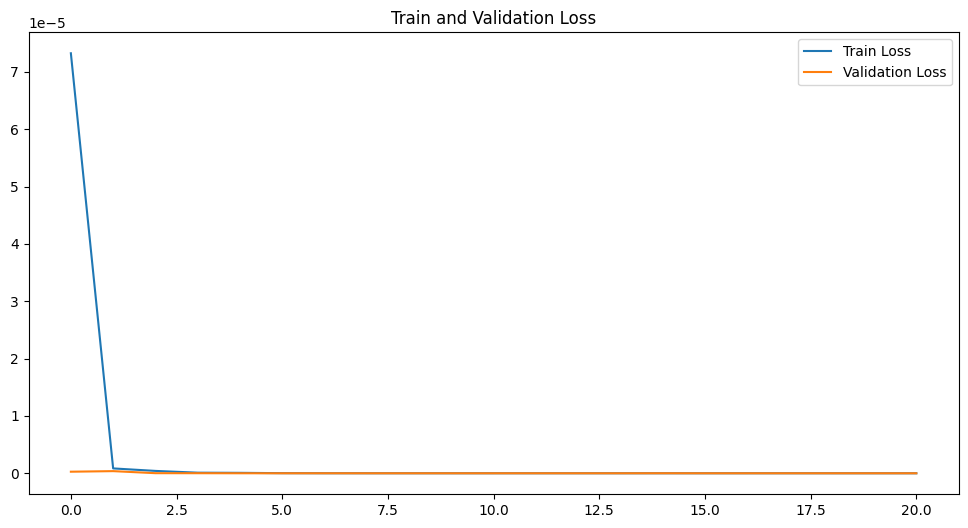

In [70]:
# Plot train and validation loss.

plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

In [71]:
y_train.shape

(102448, 1)

In [72]:
y_pred = y_test[:-2]
baseline_mse = mean_squared_error(y_test[1:-1], y_pred)
baseline_mse

4.689431529595624e-16

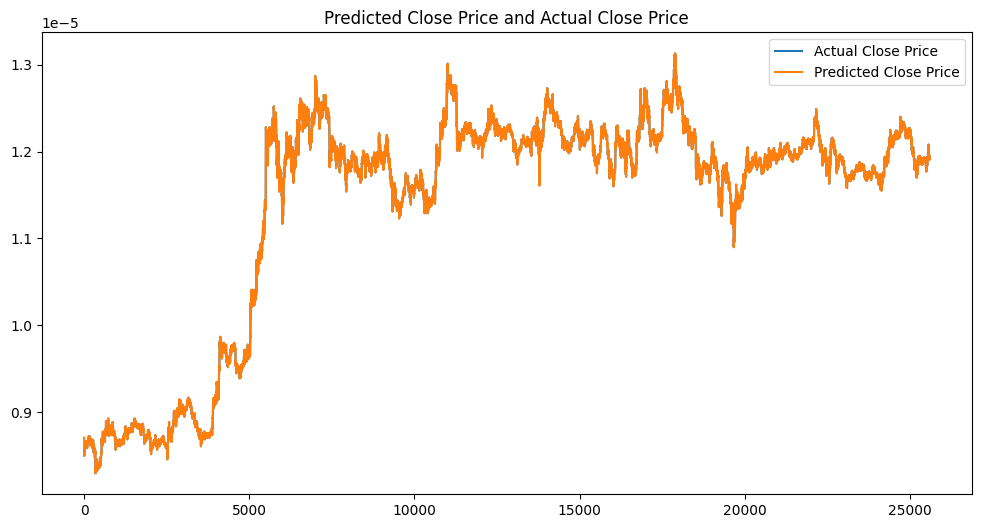

In [73]:
# Plot the predicted close price and the actual close price.

plt.figure(figsize=(12,6))
plt.plot(y_test[1:-1], label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('Predicted Close Price and Actual Close Price')
plt.legend()
plt.show()


In [74]:
# Predict the close price using the LSTM model.

y_pred_model = model.predict(X_test)

800/800 [==============================] - 5s 6ms/step


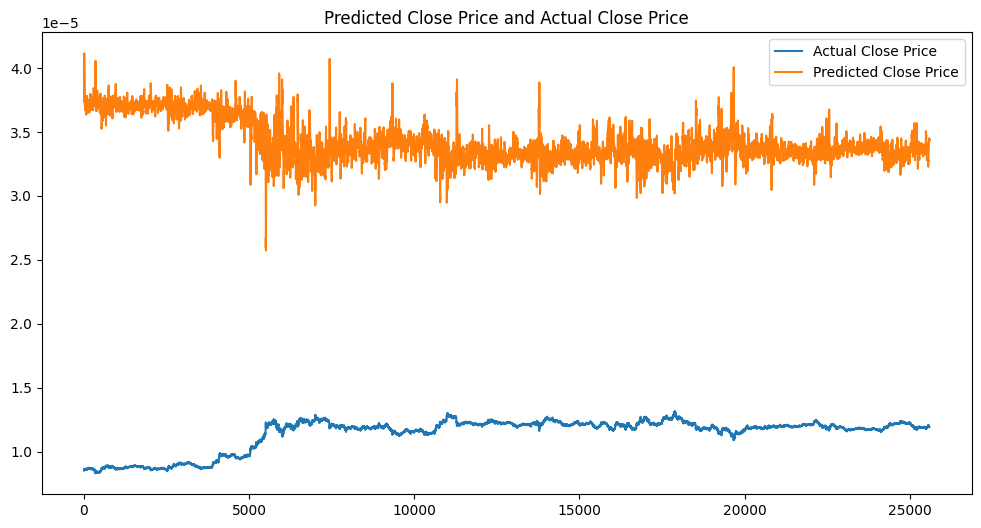

In [75]:
# Plot the predicted close price and the actual close price.

plt.figure(figsize=(12,6))
plt.plot(y_test[1:-1], label='Actual Close Price')
plt.plot(y_pred_model[:,-1], label='Predicted Close Price')
plt.title('Predicted Close Price and Actual Close Price')
plt.legend()
plt.show()


In [33]:
# Calculate the mean squared error of the LSTM model.

model_mse = mean_squared_error(y_test[:-1], y_pred_model[:-1,-1])
model_mse


3.09390706998059e-06

- Conclusion: Our model is very far off right now

## Classification?

In [7]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [43]:
# Prepare data for a classification algorithm to classify whether the next hour will be up or down using close price, volume and moving averages.

# Create a new column for the close price change.

df['Close Price Change'] = df['Close Price'].diff()

# Create a new column for the close price change direction.

df['Close Price Change Direction'] = np.where(df['Close Price Change'] > 0, 1, 0)

# Create a new column for the close price change direction shifted one hour into the future.

df['Close Price Change Direction Future'] = df['Close Price Change Direction'].shift(-1)

# Create a copy of df and drop na

df_2 = df.dropna()

# Create a new dataframe with the close price, volume and moving averages.

X = df_2[['Close Price', 'Volume', 'Close Price MA', 'Volume MA']]

# Create a new dataframe with the close price change direction shifted one hour into the future.

y = df_2['Close Price Change Direction Future']

# Drop the rows with missing values.

X = X.dropna()
y = y.dropna()

# Scale the data.

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing datasets.

train_size = int(len(X) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [44]:
# Train a XGBoost classifier to classify whether the next hour will be up or down using close price, volume and moving averages.

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

# Predict the close price change direction using the XGBoost classifier.

y_pred = model.predict(X_test)

In [47]:
# Calculate the accuracy of the XGBoost classifier.

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5357142857142857

## Classification on Minute trading

In [39]:
# Get the UIKline for PEPE token for the last 1,000 minutes

klines_minutes = binance_client.get_historical_klines('PEPEUSDC', Client.KLINE_INTERVAL_1MINUTE, limit=10000)

In [54]:
# Create a loop to fetch 10,000 minutes klines from binance, using start_str - start date string in UTC format or timestamp in milliseconds, by buckets of 30 days

start_str = '01 Jun, 2024 00:00:00'
start = datetime.strptime(start_str, '%d %b, %Y %H:%M:%S')
end = start + timedelta(days=30)

klines_minutes = []

while start < datetime.now():
    klines = binance_client.get_historical_klines('PEPEUSDC', Client.KLINE_INTERVAL_1MINUTE, start_str, end.strftime('%d %b, %Y %H:%M:%S'))
    klines_minutes.extend(klines)
    start = end
    end = start + timedelta(days=30)
    time.sleep(1)


In [57]:
# Make the klines_minutes into a pandas dataframe and add the column names.

df_minutes = pd.DataFrame(klines_minutes, columns = ['Kline Open Time', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume', 'Kline Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'])

# Convert Open Time and Close Time to datetime format.

df_minutes['Kline Open Time'] = pd.to_datetime(df_minutes['Kline Open Time'], unit='ms')
df_minutes['Kline Close Time'] = pd.to_datetime(df_minutes['Kline Close Time'], unit='ms')

# Drop the Ignore column.

df_minutes = df_minutes.drop('Ignore', axis=1)

# Set kline open time as the index of the dataframe.

df_minutes = df_minutes.set_index('Kline Open Time')

# Convert the data types of the columns to float.

df_minutes['Open Price'] = df_minutes['Open Price'].astype(float)
df_minutes['High Price'] = df_minutes['High Price'].astype(float)
df_minutes['Low Price'] = df_minutes['Low Price'].astype(float)
df_minutes['Close Price'] = df_minutes['Close Price'].astype(float)
df_minutes['Volume'] = df_minutes['Volume'].astype(float)
df_minutes['Quote Asset Volume'] = df_minutes['Quote Asset Volume'].astype(float)
df_minutes['Number of Trades'] = df_minutes['Number of Trades'].astype(float)
df_minutes['Taker Buy Base Asset Volume'] = df_minutes['Taker Buy Base Asset Volume'].astype(float)
df_minutes['Taker Buy Quote Asset Volume'] = df_minutes['Taker Buy Quote Asset Volume'].astype(float)

# Create a new column for the moving average of the close price.

df_minutes['Close Price MA'] = df_minutes['Close Price'].rolling(window=20).mean()

# Create a new column for the moving average of the volume.

df_minutes['Volume MA'] = df_minutes['Volume'].rolling(window=20).mean()

In [58]:
# Prepare the data for a classification algorithm in exactly the same way as we did for the hourly classification

# Create a new column for the close price change.

df_minutes['Close Price Change'] = df_minutes['Close Price'].diff()

# Create a new column for the close price change direction.

df_minutes['Close Price Change Direction'] = np.where(df_minutes['Close Price Change'] > 0, 1, 0)

# Create a new column for the close price change direction shifted one minute into the future.

df_minutes['Close Price Change Direction Future'] = df_minutes['Close Price Change Direction'].shift(-1)

# Create a copy of df and drop na

df_minutes_2 = df_minutes.dropna()

# Create a new dataframe with the close price, volume and moving averages.

X = df_minutes_2[['Close Price', 'Volume', 'Close Price MA', 'Volume MA']]

# Create a new dataframe with the close price change direction shifted one minute into the future.

y = df_minutes_2['Close Price Change Direction Future']

# Drop the rows with missing values.

X = X.dropna()
y = y.dropna()

# Scale the data.

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing datasets.

train_size = int(len(X) * 0.7)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Train a XGBoost classifier to classify whether the next minute will be up or down using close price, volume and moving averages.

model = XGBClassifier()
model.fit(X_train, y_train)

# Predict the close price change direction using the XGBoost classifier.

y_pred = model.predict(X_test)


In [59]:
# Calculate the accuracy of the XGBoost classifier.

accuracy = accuracy_score(y_test, y_pred)
accuracy

# Calculate the precision, recall and f1-score of the XGBoost classifier.

# from sklearn.metrics import classification_report

# report = classification_report(y_test, y_pred)
# print(report)

0.5040077031176807

In [60]:
# Create a y_pred_baseline_1 which is randomly generated, calculate the accuracy

y_pred_baseline_1 = np.random.randint(0, 2, y_test.shape)
baseline_1_accuracy = accuracy_score(y_test, y_pred_baseline_1)
baseline_1_accuracy

0.4946390464789465

In [61]:
# Create a y_pred_baseline_2 which is all 1s, calculate the accuracy

y_pred_baseline_2 = np.ones(y_test.shape)
baseline_2_accuracy = accuracy_score(y_test, y_pred_baseline_2)
baseline_2_accuracy

0.33958777910789567

In [62]:
# Create a y_pred_baseline_3 which is all 0s, calculate the accuracy

y_pred_baseline_3 = np.zeros(y_test.shape)
baseline_3_accuracy = accuracy_score(y_test, y_pred_baseline_3)
baseline_3_accuracy

0.6604122208921043

## TODO

- Integrate transactions, and best & worst traders in the analysis
- Integrate sentiment analysis, news scraping
- Integrate movements from Ethereum and other currencies
- Get much more data
- Forecast the change in price and not the price